In [177]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/ylance/Downloads/population.csv")
data.head(10)

,CountryCode,2020,2021,2022
0,ABW,106585.0,106537.0,106445.0
1,AFE,685112979.0,702977106.0,720859132.0
2,AFG,38972230.0,40099462.0,41128771.0
3,AFW,466189102.0,478185907.0,490330870.0
4,AGO,33428486.0,34503774.0,35588987.0
5,ALB,2837849.0,2811666.0,2777689.0
6,AND,77700.0,79034.0,79824.0
7,ARB,449228296.0,456520777.0,464684914.0
8,ARE,9287289.0,9365145.0,9441129.0
9,ARG,45376763.0,45808747.0,46234830.0


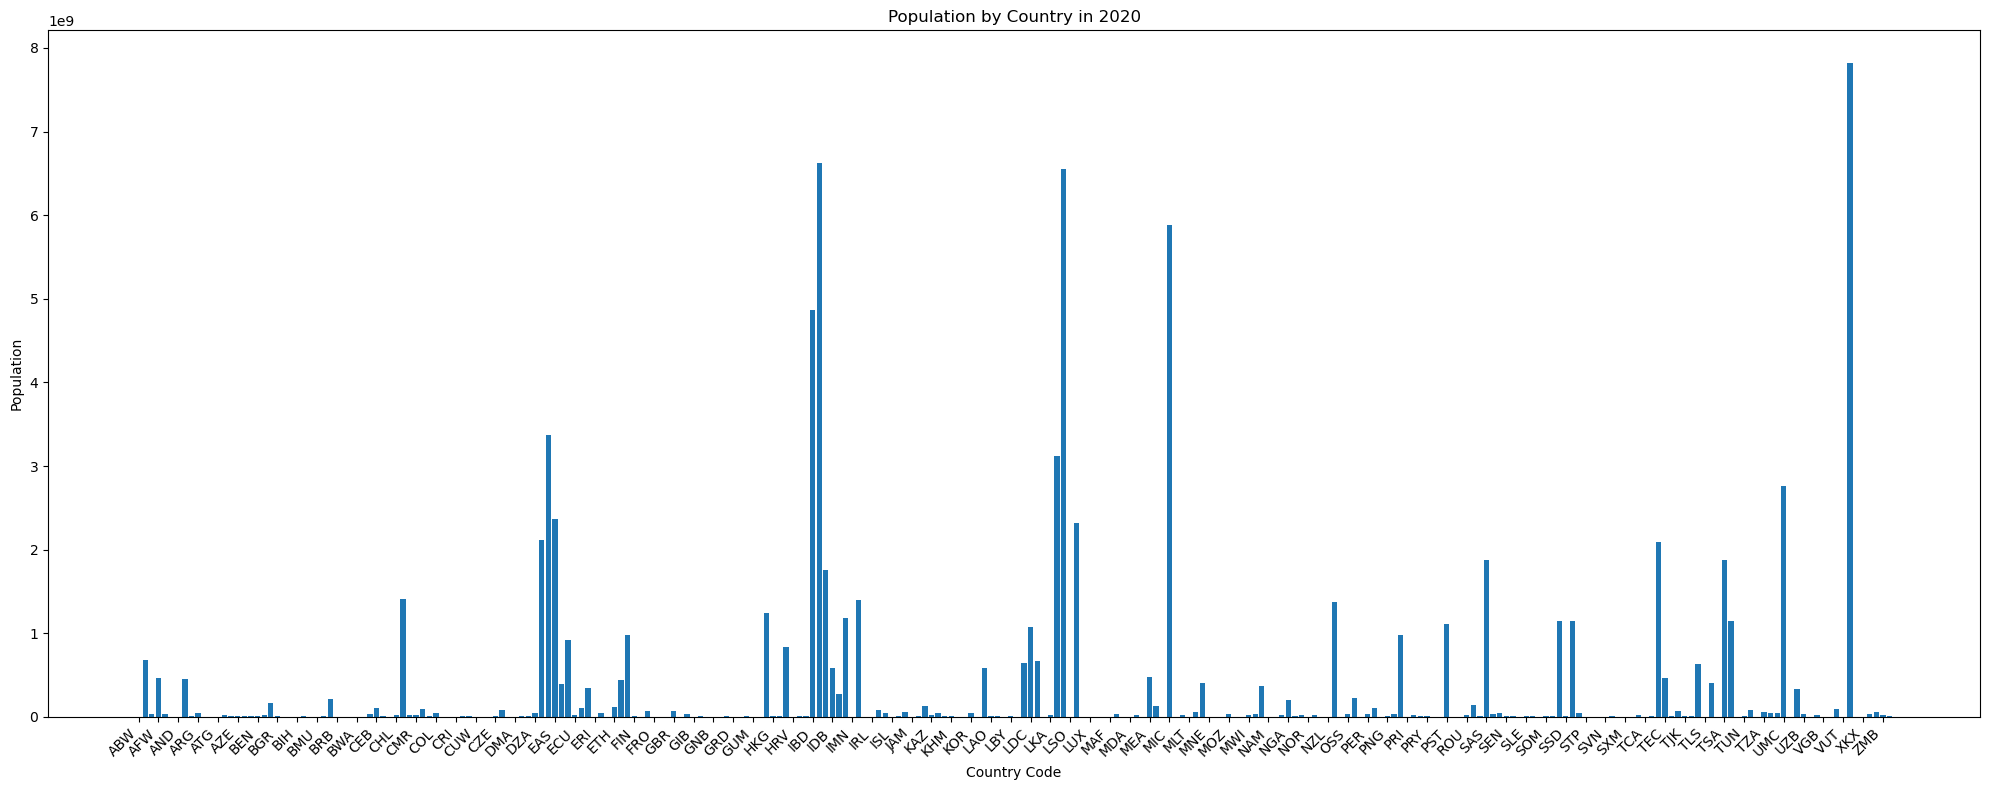

In [178]:
data = data.drop(columns=['2021', '2022'])

plt.figure(figsize= (20, 8))
plt.bar(data["CountryCode"], data["2020"])
ticks = data.index[::3] 
labels = data["CountryCode"][::3]
plt.xticks(ticks, labels, rotation=45, ha="right") 
plt.xlabel("Country Code")
plt.ylabel("Population")
plt.title("Population by Country in 2020")
plt.tight_layout()
plt.show()

In [179]:
import plotly.express as px

fig = px.bar(data, x='CountryCode', y='2020', 
             labels={'2020': 'Population', 'CountryCode': 'Country Code'},
             title='Population by Country in 2020')
fig.show()

In [180]:
policies_df = pd.read_csv("/Users/ylance/Downloads/policies.csv")
confirmed_df = pd.read_csv("/Users/ylance/Downloads/updatedconfirmed.csv")
policies_df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School_Closing,C1_Flag,C2_Workplace_Closing,C2_Flag,...,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,id,rid,self,etag,attachments,ts,UID
0,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3b3b4b21-11bb-33fd-4012-a9aa80502c36,xJxxAMlczQMBAAAAAAAAAA==,dbs/xJxxAA==/colls/xJxxAMlczQM=/docs/xJxxAMlcz...,"""060036ec-0000-0200-0000-65f036b30000""",attachments/,1710241459,AFG2020-01-01
1,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9ae4a2c9-5a4d-bb1d-1212-7529f1b3e208,xJxxAMlczQMCAAAAAAAAAA==,dbs/xJxxAA==/colls/xJxxAMlczQM=/docs/xJxxAMlcz...,"""060037ec-0000-0200-0000-65f036b30000""",attachments/,1710241459,AFG2020-01-02
2,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0eb00698-5405-5268-cb5f-1e2a8539c841,xJxxAMlczQMDAAAAAAAAAA==,dbs/xJxxAA==/colls/xJxxAMlczQM=/docs/xJxxAMlcz...,"""060038ec-0000-0200-0000-65f036b30000""",attachments/,1710241459,AFG2020-01-03
3,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,c787ce8d-86db-31e5-094d-bf098ca4ce40,xJxxAMlczQMEAAAAAAAAAA==,dbs/xJxxAA==/colls/xJxxAMlczQM=/docs/xJxxAMlcz...,"""060039ec-0000-0200-0000-65f036b30000""",attachments/,1710241459,AFG2020-01-04
4,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,38428c4e-6d04-2fe7-81ab-4cb29b8b5548,xJxxAMlczQMFAAAAAAAAAA==,dbs/xJxxAA==/colls/xJxxAMlczQM=/docs/xJxxAMlcz...,"""06003aec-0000-0200-0000-65f036b30000""",attachments/,1710241459,AFG2020-01-05


In [181]:
confirmed_df.head()

,ID,Updated,Confirmed,Confirmed_Change,CountryCode,UID,Confirmed Rolling Average,Confirmed Growth Rate
0,7159711,25-Jan-20,1,0,CAN,CAN2020-01-25,0.000000,NaN
1,7159713,26-Jan-20,1,0,CAN,CAN2020-01-26,0.000000,NaN
2,339668,29-Jan-20,3,0,CAN,CAN2020-01-29,0.400000,-0.200000
3,339669,30-Jan-20,3,0,CAN,CAN2020-01-30,0.333333,-0.166667
4,339671,1-Feb-20,4,0,CAN,CAN2020-02-01,0.375000,-0.125000


In [182]:
# Convert 'Date' in policies_df to match the UID format for merging
policies_df['UID'] = policies_df['CountryCode'] + policies_df['Date'].str.replace('-', '')

# Merging the datasets on 'UID'
merged_df = pd.merge(policies_df[['UID', 'C6_Stay_At_Home_Requirements']], confirmed_df[['UID', 'Confirmed Growth Rate']], on='UID', how='inner')

# Check the merged data
merged_df.head()

,UID,C6_Stay_At_Home_Requirements,Confirmed Growth Rate


In [183]:
# Check the UID format in each dataset
uid_policies_sample = policies_df['UID'].head()
uid_confirmed_sample = confirmed_df['UID'].head()

(uid_policies_sample, uid_confirmed_sample)

(0    AFG20200101
 1    AFG20200102
 2    AFG20200103
 3    AFG20200104
 4    AFG20200105
 Name: UID, dtype: object,
 0    CAN2020-01-25
 1    CAN2020-01-26
 2    CAN2020-01-29
 3    CAN2020-01-30
 4    CAN2020-02-01
 Name: UID, dtype: object)

In [184]:
confirmed_df['UID'] = confirmed_df['UID'].str.replace('-', '')

merged_df = pd.merge(policies_df[['UID', 'C6_Stay_At_Home_Requirements']], confirmed_df[['UID', 'Confirmed Growth Rate']], on='UID', how='inner')

merged_df.head()

,UID,C6_Stay_At_Home_Requirements,Confirmed Growth Rate
0,CAN20200125,0.0,NaN
1,CAN20200126,0.0,NaN
2,CAN20200127,0.0,NaN
3,CAN20200128,0.0,0.5
4,CAN20200129,0.0,-0.2


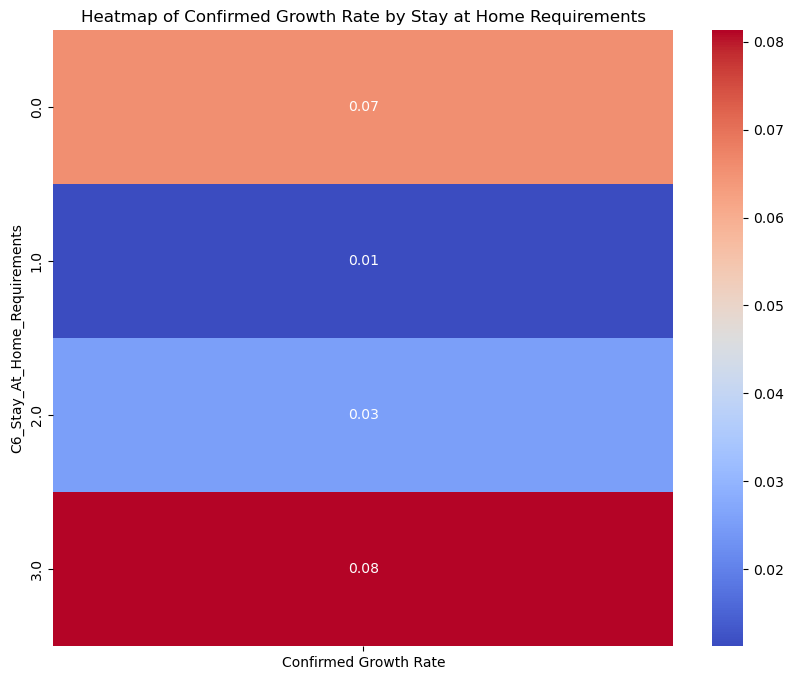

In [191]:
# Stay at Home vs Policies
import seaborn as sns

cleaned_df = merged_df.dropna(subset=['Confirmed Growth Rate'])

# Group by 'C6_Stay_At_Home_Requirements' and calculate the mean 'Confirmed Growth Rate'
grouped_data = cleaned_df.groupby('C6_Stay_At_Home_Requirements')['Confirmed Growth Rate'].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_data.pivot_table(values='Confirmed Growth Rate', index='C6_Stay_At_Home_Requirements')

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Heatmap of Confirmed Growth Rate by Stay at Home Requirements')
plt.show()

# Shows the relationship between C6_Stay_At_Home_Requirements (ranging from less restrictive to more restrictive 
# measures) and the average Confirmed Growth Rate of COVID-19 cases. 
# The intensity of the color represents the magnitude of the growth rate. Blue represents lower rates 
# (including negative growth, or reductions in new cases), and red represents higher growth rates.

In [195]:
policies_df = pd.read_csv("/Users/ylance/Downloads/policies.csv")
deaths_df = pd.read_csv("/Users/ylance/Downloads/deaths.csv")
confirmed_df = pd.read_csv("/Users/ylance/Downloads/updatedconfirmed.csv")

policy_columns = ['UID', 'C1_School_Closing', 'C2_Workplace_Closing', 'C3_Cancel_Public_Events', 'C4_Restrictions_On_Gatherings',
                           'C5_Close_Public_Transport', 'C6_Stay_At_Home_Requirements', 'C7_Restrictions_On_Internal_Movement', 'C8_International_Travel_Controls',
                                      'E1_Income_Support', 'E2_Debt_Contract_Relief', 'E4_International_Support', 'H1_Public_Information_Campaigns',
                                      'H2_Testing_Policy', 'H3_Contact_Tracing', 'H4_Emergency_Investment_in_Healthcare', 'H5_Investment_in_Vaccines', 'H6_Facial_Coverings',
                                     'H7_Vaccination_Policy', 'H8_Protection_of_Elderly_People']
merged_extended_df = pd.merge(policies_df[policy_columns], confirmed_df[['UID', 'Confirmed Growth Rate']], on='UID', how='inner')

# Merge the deaths data into the merged dataframe
merged_extended_df = pd.merge(merged_extended_df, deaths_df[['UID', 'Deaths Growth Rate']], on='UID', how='inner')

# Drop NaNs for clean correlation calculation
merged_extended_df_cleaned = merged_extended_df.dropna(subset=['Confirmed Growth Rate', 'Deaths Growth Rate'])
merged_extended_df_cleaned.head(20)


,UID,C1_School_Closing,C2_Workplace_Closing,C3_Cancel_Public_Events,C4_Restrictions_On_Gatherings,C5_Close_Public_Transport,C6_Stay_At_Home_Requirements,C7_Restrictions_On_Internal_Movement,C8_International_Travel_Controls,E1_Income_Support,...,H1_Public_Information_Campaigns,H2_Testing_Policy,H3_Contact_Tracing,H4_Emergency_Investment_in_Healthcare,H5_Investment_in_Vaccines,H6_Facial_Coverings,H7_Vaccination_Policy,H8_Protection_of_Elderly_People,Confirmed Growth Rate,Deaths Growth Rate
23,ITA2020-02-22,0.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,...,2.0,1.0,2.0,0.0,0.0,0,0.0,0.0,3.099537,0.916667
24,ITA2020-02-23,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,1.0,2.0,0.0,0.0,0,0.0,3.0,0.845195,0.440000
25,ITA2020-02-24,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,1.0,2.0,0.0,0.0,0,0.0,3.0,0.474792,0.923077
26,ITA2020-02-25,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,1.0,2.0,0.0,0.0,0,0.0,3.0,0.357481,0.604938
27,ITA2020-02-26,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0,0.0,3.0,0.334933,0.157143
28,ITA2020-02-27,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0,0.0,3.0,0.412314,0.367816
29,ITA2020-02-28,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0,0.0,3.0,0.321708,0.194118
30,ITA2020-02-29,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0,0.0,3.0,0.270880,0.380952
31,ITA2020-03-01,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0,0.0,3.0,0.502664,0.172414
32,ITA2020-03-02,3.0,3.0,2.0,4.0,0.0,2.0,2.0,3.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0,0.0,3.0,0.202128,0.529412


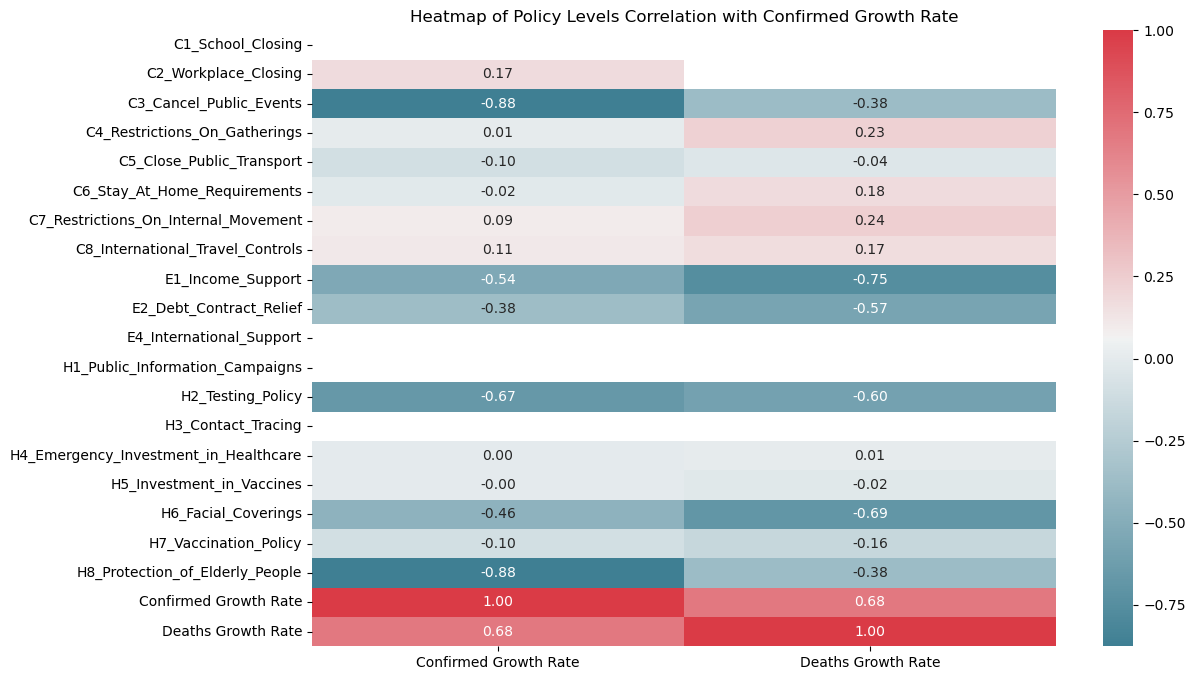

In [202]:
import numpy as np
import seaborn as sns

# Calculate the correlation matrix between policy levels and confirmed growth rate
correlation_matrix = merged_extended_df_cleaned.drop('UID', axis=1).corr()

# Filter for only 'Confirmed Growth Rate' and 'Deaths Growth Rate' correlations
target_columns = ['Confirmed Growth Rate', 'Deaths Growth Rate']
correlation_matrix = correlation_matrix[target_columns].loc[policy_columns[1:] + target_columns]

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap=cmap, fmt=".2f")
heatmap.set_title('Heatmap of Policy Levels Correlation with Confirmed Growth Rate')
plt.show()

In [205]:
# Get the correlation values for 'C1_School_Closing'
c1_school_closing_corr = correlation_matrix.loc['C2_Workplace_Closing']
c1_school_closing_corr

Confirmed Growth Rate    0.172132
Deaths Growth Rate       0.332938
Name: C2_Workplace_Closing, dtype: float64

In [154]:
### Standardizing

confirmed_df = pd.read_csv('/Users/ylance/Downloads/confirmed.csv')
population_df = pd.read_csv('/Users/ylance/Downloads/population.csv')

# Find the maximum number of confirmed cases for each country
max_confirmed_per_country = confirmed_df.groupby('CountryCode')['Confirmed'].max().reset_index()
max_confirmed_per_country.head()

,CountryCode,Confirmed
0,CAN,946370
1,DEU,2689205
2,FRA,4513685
3,GBR,4312908
4,ITA,3440862


In [155]:
# Calculate the sum of populations for 2020 and 2021 for each country
population_df['Population_Sum'] = population_df['2020'] + population_df['2021']
population_sum_per_country = population_df[['CountryCode', 'Population_Sum']]
population_sum_per_country.head()

,CountryCode,Population_Sum
0,ABW,2.131220e+05
1,AFE,1.388090e+09
2,AFG,7.907169e+07
3,AFW,9.443750e+08
4,AGO,6.793226e+07


In [156]:
# Merge the datasets on 'CountryCode'
merged_df = pd.merge(max_confirmed_per_country, population_sum_per_country, on='CountryCode')

# Calculate the standardized confirmed cases
merged_df['Standardized_Confirmed'] = merged_df['Confirmed'] / merged_df['Population_Sum']
merged_df.head(11)

,CountryCode,Confirmed,Population_Sum,Standardized_Confirmed
0,CAN,946370,76233664.0,0.012414
1,DEU,2689205,166356949.0,0.016165
2,FRA,4513685,135335411.0,0.033352
3,GBR,4312908,134107526.0,0.032160
4,ITA,3440862,118572024.0,0.029019
5,JPN,459043,251942593.0,0.001822
6,KOR,100276,103581115.0,0.000968
7,NZL,2493,10201600.0,0.000244
8,RUS,4483471,288203621.0,0.015557
9,SWE,765984,20769253.0,0.036881


In [157]:
updated_confirmed_df = pd.read_csv('/Users/ylance/Downloads/updatedconfirmed.csv')
policies_df = pd.read_csv('/Users/ylance/Downloads/policies.csv')

In [158]:
# Convert date formats to ensure consistency
updated_confirmed_df['Updated'] = pd.to_datetime(updated_confirmed_df['Updated'], dayfirst=True)
policies_df['Date'] = pd.to_datetime(policies_df['Date'])

# Merge the datasets on 'CountryCode' and 'Date'
merged_data = pd.merge(updated_confirmed_df, policies_df, left_on=['CountryCode', 'Updated'], right_on=['CountryCode', 'Date'], how='inner')

# Filter out the relevant columns for the regression analysis
analysis_df = merged_data[['Confirmed Growth Rate', 'C1_School_Closing', 'C2_Workplace_Closing', 'C3_Cancel_Public_Events', 'C4_Restrictions_On_Gatherings',
                           'C5_Close_Public_Transport', 'C6_Stay_At_Home_Requirements', 'C7_Restrictions_On_Internal_Movement', 'C8_International_Travel_Controls',
                                      'E1_Income_Support', 'E2_Debt_Contract_Relief', 'E4_International_Support', 'H1_Public_Information_Campaigns',
                                      'H2_Testing_Policy', 'H3_Contact_Tracing', 'H4_Emergency_Investment_in_Healthcare', 'H5_Investment_in_Vaccines', 'H6_Facial_Coverings',
                                     'H7_Vaccination_Policy', 'H8_Protection_of_Elderly_People']]

analysis_df.isnull().sum()

Confirmed Growth Rate                    99
C1_School_Closing                         0
C2_Workplace_Closing                      0
C3_Cancel_Public_Events                   0
C4_Restrictions_On_Gatherings             0
C5_Close_Public_Transport                 0
C6_Stay_At_Home_Requirements              0
C7_Restrictions_On_Internal_Movement      0
C8_International_Travel_Controls          0
E1_Income_Support                         0
E2_Debt_Contract_Relief                   0
E4_International_Support                  0
H1_Public_Information_Campaigns           0
H2_Testing_Policy                         0
H3_Contact_Tracing                        0
H4_Emergency_Investment_in_Healthcare     0
H5_Investment_in_Vaccines                 0
H6_Facial_Coverings                       0
H7_Vaccination_Policy                     0
H8_Protection_of_Elderly_People           0
dtype: int64

In [159]:
analysis_df.head()

,Confirmed Growth Rate,C1_School_Closing,C2_Workplace_Closing,C3_Cancel_Public_Events,C4_Restrictions_On_Gatherings,C5_Close_Public_Transport,C6_Stay_At_Home_Requirements,C7_Restrictions_On_Internal_Movement,C8_International_Travel_Controls,E1_Income_Support,E2_Debt_Contract_Relief,E4_International_Support,H1_Public_Information_Campaigns,H2_Testing_Policy,H3_Contact_Tracing,H4_Emergency_Investment_in_Healthcare,H5_Investment_in_Vaccines,H6_Facial_Coverings,H7_Vaccination_Policy,H8_Protection_of_Elderly_People
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0
2,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0
3,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0
4,-0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,35.0,0.0,0,0.0,0.0


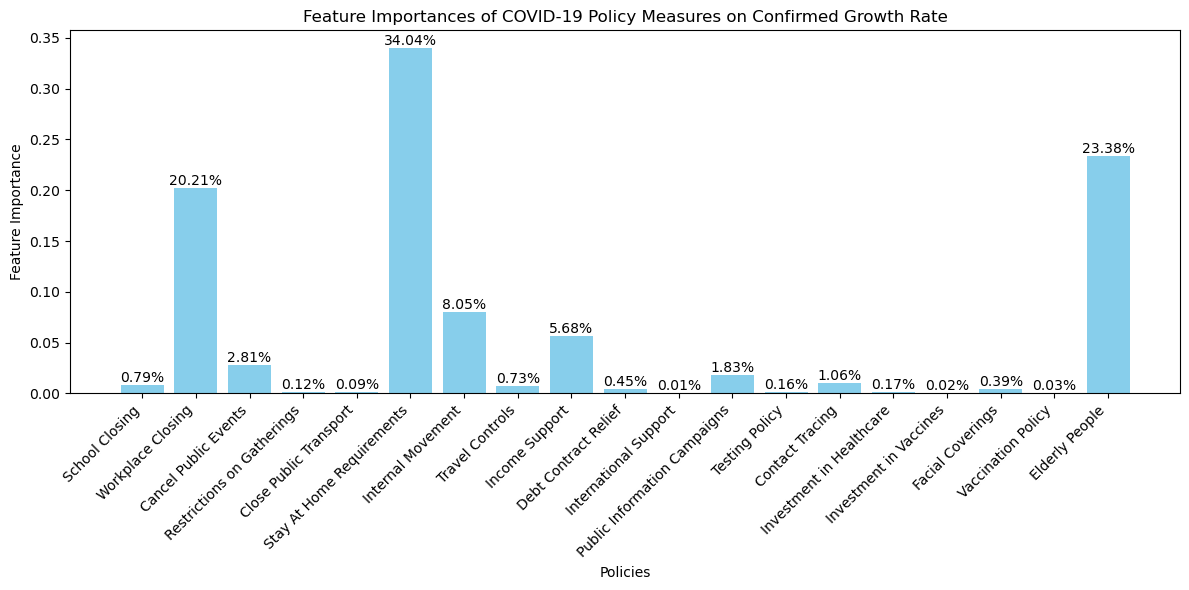

The MSE of the model on the test set is:
 0.03906230771886051


In [160]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Remove rows with missing target variable
analysis_df_clean = analysis_df.dropna(subset=['Confirmed Growth Rate'])

# Split the data into features and target
X = analysis_df_clean.drop(columns=['Confirmed Growth Rate'])
y = analysis_df_clean['Confirmed Growth Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set and calculate the mean squared error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

# Feature names
feature_names = ['School Closing', 'Workplace Closing', 'Cancel Public Events', 'Restrictions on Gatherings', 'Close Public Transport',
                 'Stay At Home Requirements', 'Internal Movement', 'Travel Controls', 'Income Support', 'Debt Contract Relief', 'International Support',
                 'Public Information Campaigns', 'Testing Policy', 'Contact Tracing', 'Investment in Healthcare', 'Investment in Vaccines',
                 'Facial Coverings', 'Vaccination Policy', 'Elderly People']
feature_importances = model.feature_importances_

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_names, feature_importances, color='skyblue')

# Annotate the bars with feature importance values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2%}", va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

plt.xlabel('Policies')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of COVID-19 Policy Measures on Confirmed Growth Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("The MSE of the model on the test set is:\n", mse)

# Output the MSE and feature importances
#print("The MSE of the model on the test set is:\n", mse)
#print("The feature importance of School Closing is:\n", feature_importances[0])
#print("The feature importance of Workplace Closing is:\n", feature_importances[1])
#print("The feature importance of Close Public Transport is:\n", feature_importances[2])
#print("The feature importance of Stay At Home Requirements is:\n", feature_importances[3])
#print("The feature importance of Facial Coverings is:\n", feature_importances[4])

In [161]:
analysis_df_clean.head()

,Confirmed Growth Rate,C1_School_Closing,C2_Workplace_Closing,C3_Cancel_Public_Events,C4_Restrictions_On_Gatherings,C5_Close_Public_Transport,C6_Stay_At_Home_Requirements,C7_Restrictions_On_Internal_Movement,C8_International_Travel_Controls,E1_Income_Support,E2_Debt_Contract_Relief,E4_International_Support,H1_Public_Information_Campaigns,H2_Testing_Policy,H3_Contact_Tracing,H4_Emergency_Investment_in_Healthcare,H5_Investment_in_Vaccines,H6_Facial_Coverings,H7_Vaccination_Policy,H8_Protection_of_Elderly_People
2,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0
3,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0
4,-0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,35.0,0.0,0,0.0,0.0
5,-0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,35.0,0.0,0,0.0,0.0
6,-0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,35.0,0.0,0,0.0,0.0


In [162]:
deaths_df = pd.read_csv('/Users/ylance/Downloads/deaths.csv')
policies_df = pd.read_csv('/Users/ylance/Downloads/policies.csv')

# Convert date formats to ensure consistency
deaths_df['Updated'] = pd.to_datetime(updated_confirmed_df['Updated'], dayfirst=True)
policies_df['Date'] = pd.to_datetime(policies_df['Date'])

# Merge the datasets on 'CountryCode' and 'Date'
deaths_policies_merged = pd.merge(deaths_df, policies_df, left_on=['CountryCode', 'Updated'], right_on=['CountryCode', 'Date'], how='inner')

# Filter out the relevant columns for the regression analysis
analysis_df = deaths_policies_merged[['Deaths Growth Rate', 'C1_School_Closing', 'C2_Workplace_Closing', 'C3_Cancel_Public_Events', 'C4_Restrictions_On_Gatherings',
                           'C5_Close_Public_Transport', 'C6_Stay_At_Home_Requirements', 'C7_Restrictions_On_Internal_Movement', 'C8_International_Travel_Controls',
                                      'E1_Income_Support', 'E2_Debt_Contract_Relief', 'E4_International_Support', 'H1_Public_Information_Campaigns',
                                      'H2_Testing_Policy', 'H3_Contact_Tracing', 'H4_Emergency_Investment_in_Healthcare', 'H5_Investment_in_Vaccines', 'H6_Facial_Coverings',
                                     'H7_Vaccination_Policy', 'H8_Protection_of_Elderly_People']]

analysis_df.isnull().sum()

Deaths Growth Rate                       23
C1_School_Closing                         0
C2_Workplace_Closing                      0
C3_Cancel_Public_Events                   0
C4_Restrictions_On_Gatherings             0
C5_Close_Public_Transport                 0
C6_Stay_At_Home_Requirements              0
C7_Restrictions_On_Internal_Movement      0
C8_International_Travel_Controls          0
E1_Income_Support                         0
E2_Debt_Contract_Relief                   0
E4_International_Support                  0
H1_Public_Information_Campaigns           0
H2_Testing_Policy                         0
H3_Contact_Tracing                        0
H4_Emergency_Investment_in_Healthcare     0
H5_Investment_in_Vaccines                 0
H6_Facial_Coverings                       0
H7_Vaccination_Policy                     0
H8_Protection_of_Elderly_People           0
dtype: int64

In [171]:
# Remove rows with missing target variable
analysis_df_clean = analysis_df.dropna(subset=['Deaths Growth Rate'])

# Split the data into features and target
X = analysis_df_clean[['Deaths Growth Rate', 'C1_School_Closing', 'C2_Workplace_Closing', 'C3_Cancel_Public_Events', 'C4_Restrictions_On_Gatherings',
                           'C5_Close_Public_Transport', 'C6_Stay_At_Home_Requirements', 'C7_Restrictions_On_Internal_Movement', 'C8_International_Travel_Controls',
                                      'E1_Income_Support', 'E2_Debt_Contract_Relief', 'E4_International_Support', 'H1_Public_Information_Campaigns',
                                      'H2_Testing_Policy', 'H3_Contact_Tracing', 'H4_Emergency_Investment_in_Healthcare', 'H5_Investment_in_Vaccines', 'H6_Facial_Coverings',
                                     'H7_Vaccination_Policy', 'H8_Protection_of_Elderly_People']]
y = analysis_df_clean['Deaths Growth Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set and calculate the mean squared error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

feature_importances = model.feature_importances_

# Output the MSE and feature importances
print("The MSE of the model on the test set is:\n", mse)
#print("The feature importance of School Closing is:\n", feature_importances[0])
#print("The feature importance of Workplace Closing is:\n", feature_importances[1])
#print("The feature importance of Close Public Transport is:\n", feature_importances[2])
#print("The feature importance of Stay At Home Requirements is:\n", feature_importances[3])
#print("The feature importance of Facial Coverings is:\n", feature_importances[4])

The MSE of the model on the test set is:
 4.9248056861849915e-06


In [168]:
analysis_df_clean.head()

,Deaths Growth Rate,C1_School_Closing,C2_Workplace_Closing,C3_Cancel_Public_Events,C4_Restrictions_On_Gatherings,C5_Close_Public_Transport,C6_Stay_At_Home_Requirements,C7_Restrictions_On_Internal_Movement,C8_International_Travel_Controls,E1_Income_Support,E2_Debt_Contract_Relief,E4_International_Support,H1_Public_Information_Campaigns,H2_Testing_Policy,H3_Contact_Tracing,H4_Emergency_Investment_in_Healthcare,H5_Investment_in_Vaccines,H6_Facial_Coverings,H7_Vaccination_Policy,H8_Protection_of_Elderly_People
1,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,-0.018964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.022535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
5,0.440000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
6,-0.002307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [169]:
analysis_df_clean.isnull().sum()

Deaths Growth Rate                       0
C1_School_Closing                        0
C2_Workplace_Closing                     0
C3_Cancel_Public_Events                  0
C4_Restrictions_On_Gatherings            0
C5_Close_Public_Transport                0
C6_Stay_At_Home_Requirements             0
C7_Restrictions_On_Internal_Movement     0
C8_International_Travel_Controls         0
E1_Income_Support                        0
E2_Debt_Contract_Relief                  0
E4_International_Support                 0
H1_Public_Information_Campaigns          0
H2_Testing_Policy                        0
H3_Contact_Tracing                       0
H4_Emergency_Investment_in_Healthcare    0
H5_Investment_in_Vaccines                0
H6_Facial_Coverings                      0
H7_Vaccination_Policy                    0
H8_Protection_of_Elderly_People          0
dtype: int64

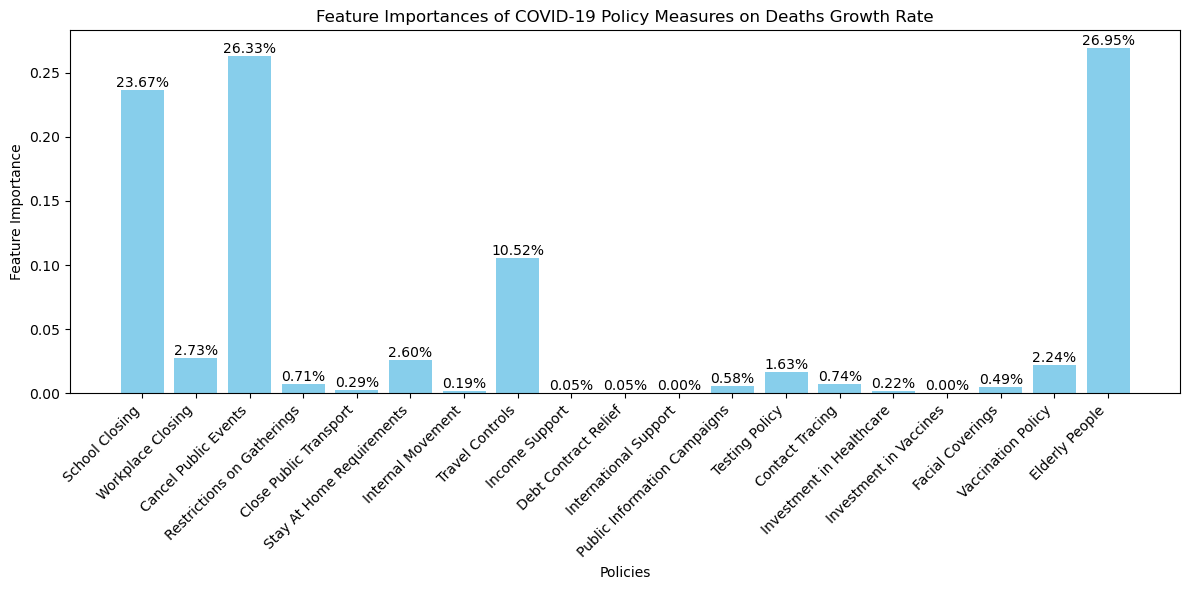

The MSE of the model on the test set is:
 0.012737208307638687


In [170]:
# Merge the datasets on 'CountryCode' and 'Date'
deaths_df['Updated'] = pd.to_datetime(deaths_df['Updated'], dayfirst=True)
policies_df['Date'] = pd.to_datetime(policies_df['Date'])
deaths_policies_merged = pd.merge(deaths_df, policies_df, left_on=['CountryCode', 'Updated'], right_on=['CountryCode', 'Date'], how='inner')

# Filter out the relevant columns for the regression analysis
analysis_df = deaths_policies_merged[['Deaths Growth Rate', 'C1_School_Closing', 'C2_Workplace_Closing', 'C3_Cancel_Public_Events', 'C4_Restrictions_On_Gatherings',
                           'C5_Close_Public_Transport', 'C6_Stay_At_Home_Requirements', 'C7_Restrictions_On_Internal_Movement', 'C8_International_Travel_Controls',
                                      'E1_Income_Support', 'E2_Debt_Contract_Relief', 'E4_International_Support', 'H1_Public_Information_Campaigns',
                                      'H2_Testing_Policy', 'H3_Contact_Tracing', 'H4_Emergency_Investment_in_Healthcare', 'H5_Investment_in_Vaccines', 'H6_Facial_Coverings',
                                     'H7_Vaccination_Policy', 'H8_Protection_of_Elderly_People']]

# Remove rows with missing target variable
analysis_df_clean = analysis_df.dropna(subset=['Deaths Growth Rate'])

# Split the data into features and target
X = analysis_df_clean.drop(columns=['Deaths Growth Rate'])
y = analysis_df_clean['Deaths Growth Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set and calculate the mean squared error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

# Feature names
feature_names = ['School Closing', 'Workplace Closing', 'Cancel Public Events', 'Restrictions on Gatherings', 'Close Public Transport',
                 'Stay At Home Requirements', 'Internal Movement', 'Travel Controls', 'Income Support', 'Debt Contract Relief', 'International Support',
                 'Public Information Campaigns', 'Testing Policy', 'Contact Tracing', 'Investment in Healthcare', 'Investment in Vaccines',
                 'Facial Coverings', 'Vaccination Policy', 'Elderly People']
feature_importances = model.feature_importances_

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_names, feature_importances, color='skyblue')

# Annotate the bars with feature importance values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2%}", va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

plt.xlabel('Policies')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of COVID-19 Policy Measures on Deaths Growth Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("The MSE of the model on the test set is:\n", mse)